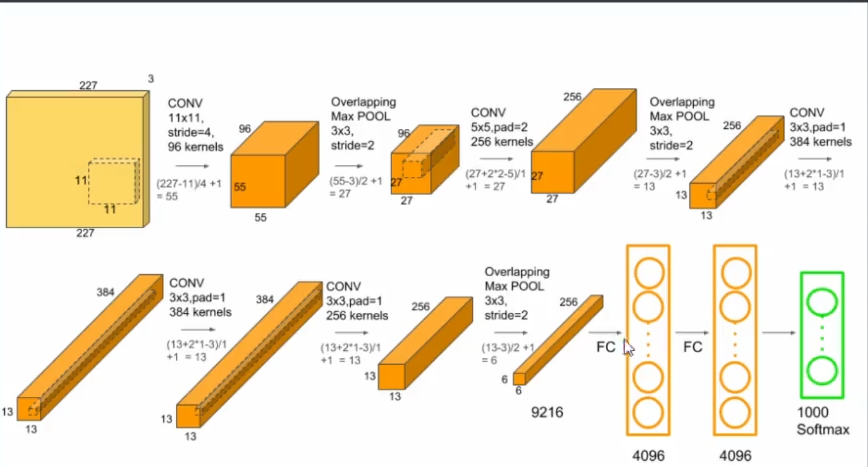

In [1]:
import torch
from torch.nn import functional as F
from torch import nn
from torchinfo import summary

In [2]:
data = torch.ones(size=(10,3,227,227))

In [3]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels = 96,
                               kernel_size=11,
                               stride=4)
        self.pool1 = nn.MaxPool2d(kernel_size=3,stride=2)
        #卷积核 步长 恢复到正常的大小，进一步扩大channel来提取数据
        self.conv2 = nn.Conv2d(in_channels=96,
                               out_channels = 256,
                               kernel_size=5,
                               padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3,stride=2)

        self.conv3 = nn.Conv2d(in_channels=256,out_channels=384, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(in_channels=384,out_channels=384, kernel_size=3,padding=1)
        self.conv5 = nn.Conv2d(in_channels=384,out_channels=256, kernel_size=3,padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3,stride=2)
        #全连接层---信息汇总
        #第5层卷积后的输出的形状为 (batch_size, 256, 6, 6)，因此在全连接层中输入的大小就是 66256。
        self.fc1 = nn.Linear(6*6*256,4096)
        self.fc2 = nn.Linear(4096,4096)
        self.fc3 = nn.Linear(4096,1000)

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
            
        x = self.pool3(x)

        x = x.view(-1,6*6*256)
        x = F.dropout(x,p=0.5)
        x = F.relu(F.dropout(self.fc1(x),p=0.5))

        # x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        output = F.softmax(self.fc3(x),dim=1)


In [4]:
net = Model()

In [5]:
net(data)

In [6]:
summary(net,input_size=(10,3,227,227))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    --                        --
├─Conv2d: 1-1                            [10, 96, 55, 55]          34,944
├─MaxPool2d: 1-2                         [10, 96, 27, 27]          --
├─Conv2d: 1-3                            [10, 256, 27, 27]         614,656
├─MaxPool2d: 1-4                         [10, 256, 13, 13]         --
├─Conv2d: 1-5                            [10, 384, 13, 13]         885,120
├─Conv2d: 1-6                            [10, 384, 13, 13]         1,327,488
├─Conv2d: 1-7                            [10, 256, 13, 13]         884,992
├─MaxPool2d: 1-8                         [10, 256, 6, 6]           --
├─Linear: 1-9                            [10, 4096]                37,752,832
├─Linear: 1-10                           [10, 4096]                16,781,312
├─Linear: 1-11                           [10, 1000]                4,097,000
Total params: 62,378,344
Trainable p